## Работа со списками

In [10]:
l=[1,2,3,4,5,6]
l[::-1]

[6, 5, 4, 3, 2, 1]

In [23]:
def digits(x, base=16):
  l = []
  while x>0:
    l.append(x%base)
    x//=base
  return l

l = digits(1234)[::-1]


In [30]:
def to_digit(x):
  if x<10:
    return str(x)
  else:
    return chr(65+x-10)

for c in l:
  print(to_digit(c),end='')

4D2

In [37]:
''.join(map(to_digit,l))

'4D2'

In [38]:
l = ["Hi","there","How","are","you","?"]

In [46]:
sum(filter(lambda x: x>2,map(len,l)))

14

## Снова простые числа

In [49]:
def factor(n):
  i = 2
  res = []
  while n>1:
    if n%i==0:
      n = n//i
      res.append(i)
    else:
      i+=1
  return res

In [54]:
factor(24)

[2, 2, 2, 3]

In [55]:
for i in range(2,100):
  if len(factor(i))==1:
    print(i,end=' ')

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

In [62]:
' '.join(map(lambda x: str(x[0]),filter(lambda x: len(x)==1,map(factor,range(2,100)))))

'2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97'

In [69]:
' '.join([ str(x) for x in range(2,100) if len(factor(x))==1 ])

'2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97'

In [74]:
S = [True]*100
for i in range(2,100):
  if S[i]:
    for j in range(i*2,100,i):
      S[j] = False

In [76]:
[ i for i in range(2,100) if S[i] ]

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [83]:
S = set(range(2,100))
for i in range(2,100):
  if i in S:
    S = S-set(range(i*2,100,i))
S

{2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97}

## Генераторы

In [86]:
def factor(n):
  i = 2
  while n>1:
    if n%i==0:
      n = n//i
      yield i
    else:
      i+=1

In [97]:
for x in factor(176):
  print(x)

2
2
2
2
11


In [100]:
s = 0
while u<4000000:
  if u%2==0:
    s+=u
  u,v = v,u+v

print(s)

4613732


In [102]:
def fib(max):
  u,v = 1,2
  res = []
  while u<max:
    res.append(u)
    u,v = v,u+v
  return res

sum(filter(lambda x: x%2==0,fib(4000000)))


4613732

In [103]:
def fib(max):
  u,v = 1,2
  while u<max:
    yield u
    u,v = v,u+v

sum(filter(lambda x: x%2==0,fib(4000000)))


4613732

In [107]:
def fib():
  u,v = 1,2
  while True:
    yield u
    u,v = v,u+v

In [111]:
import itertools
sum(filter(lambda x: x%2==0,itertools.takewhile(lambda x: x<4000000,fib())))

4613732

## Анализируем текст

In [113]:
f = open('akar_ru.txt','r')
text = f.readlines()
text[0:10]

['                           Лев Николаевич Толстой\n',
 '\n',
 '                              Анна Каренина\n',
 '\n',
 '                                                 Мне отмщение, и аз воздам\n',
 '\n',
 '                                ЧАСТЬ ПЕРВАЯ\n',
 '\n',
 '                                     I\n',
 '\n']

In [116]:
text = [ x.strip() for x in text if x.strip()!="" ]
text[100:110]

['самые сложные и неразрешимые вопросы. Ответ этот: надо жить потребностя-',
 'ми дня, то есть забыться. Забыться сном уже нельзя, по крайней  мере  до',
 'ночи, нельзя уже вернуться к той музыке, которую пели  графинчики-женщи-',
 'ны; стало быть, надо забыться сном жизни,',
 '"Там видно будет, - сказал себе Степан Аркадьич и, встав, надел  серый',
 'халат на голубой шелковой подкладке, закинул кисти узлом и, вдоволь заб-',
 'рав воздуха в свой широкий грудной ящик, привычным бодрым шагом выверну-',
 'тых ног, так легко носивших его полное тело, подошел к окну, поднял сто-',
 'ру и громко позвонил. На звонок тотчас же вошел старый друг,  камердинер',
 'Матвей, неся платье, сапоги и телеграмму. Вслед за Матвеем вошел  и  ци-']

In [121]:
text[101].split(' ')

['ми',
 'дня,',
 'то',
 'есть',
 'забыться.',
 'Забыться',
 'сном',
 'уже',
 'нельзя,',
 'по',
 'крайней',
 '',
 'мере',
 '',
 'до']

In [124]:
def split(s):
  for x in ",.!?'\"()-":
    s = s.replace(x,' ')
  return s.split()

split(text[101])

['ми',
 'дня',
 'то',
 'есть',
 'забыться',
 'Забыться',
 'сном',
 'уже',
 'нельзя',
 'по',
 'крайней',
 'мере',
 'до']

In [150]:
words = list(itertools.chain(*[split(x.lower()) for x in text ]))

In [152]:
print(f"Число слов = {len(words)}")
print(f"Число уникальных слов = {len(set(words))}")

Число слов = 278014
Число уникальных слов = 37688


In [163]:
d = { "one" : "один", 'two' : 'два' } 

In [164]:
d['three'] = 'три'

In [169]:
list(d.items())

[('one', 'один'), ('two', 'два'), ('three', 'три')]

In [170]:
d = {}
for x in words:
  if x in d:
    d[x] = d[x] + 1
  else:
    d[x] = 1

In [172]:
wordlist = list(d.items())

In [179]:
wordlist.sort(key=lambda x: -x[1])
[ (w,c) for (w,c) in wordlist if len(w)>3][:10]

[('было', 1630),
 ('сказал', 1344),
 ('левин', 1109),
 ('только', 1013),
 ('когда', 855),
 ('теперь', 788),
 ('сказала', 785),
 ('была', 710),
 ('кити', 643),
 ('него', 604)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

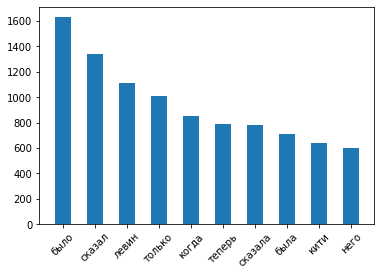

In [184]:
import matplotlib.pyplot as plt

w = [ w for (w,c) in wordlist if len(w)>3][:10]
c = [ c for (w,c) in wordlist if len(w)>3][:10]

plt.bar(w,c,width=0.5)
plt.xticks(rotation=45)


In [ ]:
# 